# Week 7 Exercises - Review
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 14.3.2017   
Helsinki Metropolia University of Applied Sciences 

In [112]:
# Initial import statements
%pylab inline 
from math import factorial 

Populating the interactive namespace from numpy and matplotlib


### Exercise 1
The sine function can be approximated with following series:  

\begin{align}
\sin(x) \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \; ... 
\end{align}

  
(a) Draw in the same graph the sine function and its 7th order polynomial approximation in range $x \in [-\pi, \pi]$  
(b) Where (x-value) in the given range does the the 7th order polynomial approximation differ most? How much is the true error in that point?  
(c) What is the largest relative approximation error (in absolute values) between the 5th order and 7th order polynomials within the given range?  
(d) How many terms we need in the approximation in order that we have the value of $\sin(x)$ correct at least 4 significant figures everywhere in the given range?

### Solution
(a) First, we create a function that approximate sine to 7th order polynomial. Then we plot the imported sin() function and the sin_poly_7() function with x from $[-\pi, \pi]$ in a same figure, with blue and green line color respectively.

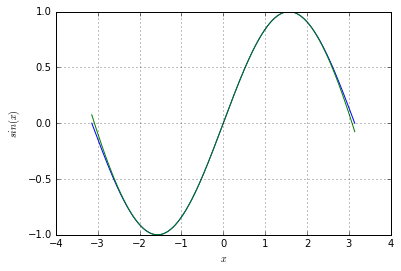

In [113]:
# 7th order polynomial approximation of sin(x)
def sin_poly_7(x):
    return x - x**3/factorial(3) + x**5/factorial(5) - x**7/factorial(7)

x = linspace(-pi, pi, 1000)
y = sin(x)
y_about_7 = sin_poly_7(x)

figure('exercise 1a')
xlabel("$x$")
ylabel("$sin(x)$")
plot(x, y, 'b')
plot(x, y_about_7, 'g')
grid()
show()

(b) From the graph, we could see that the 2 functions differ most at the boundaries of the given range of x-value $[-\pi\;, \pi]$. 
To locate exactly that x-value, we make an array of absolute values of the true errors of the 2 functions. We locate that x-value by getting the index of the maximum value of the true errors array. 

In [114]:
true_errors = abs(y-y_about_7)
print("x =",x[argmax(true_errors)], "/ true error = ", max(true_errors))

x = -3.14159265359 / true error =  0.0752206159036


(c) First, we create a function that approximate sine to 5th order polynomial. Then we plot the  sin_poly_7() function and the sin_poly_7() function with x from  $[-\pi, \pi]$ in a same figure. From the graph we could see that the 2 functions diverge at both ends, but to locate exactly the largest relative error we need to calculate an array of relative errors. Finally, we use the imported function max() to get the largest relative error value.

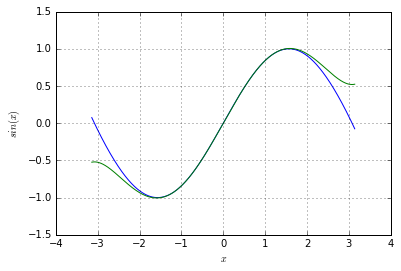


# Largest relative error: 793796.056341 % at x =  3.07869790577


In [115]:
# 5th order polynomial approximation of sin(x)
def sin_poly_5(x):
    return x - x**3/factorial(3) + x**5/factorial(5) 

y_about_5 = sin_poly_5(x)

figure("exercise 1c")
plot(x, y_about_7)
plot(x, y_about_5)
xlabel("$x$")
ylabel("$sin(x)$")
grid()
show()
rel_errors = abs((y_about_7 - y_about_5)/(y_about_7))

print()
print('# Largest relative error:', max(rel_errors) * 100, '% at x = ', x[argmax(rel_errors)])

(d) We start with x as the first term i = 1 of the approximation series. We then continue adding $(-1)^i\frac{x^{2i+1}}{(2i+1)!} $ to the approximation of y, and for each term added, we calculate an array of true errors. We break the loop and return the number of terms needed when the largest absolute value of the true errors array is less than the stop criteria, which is based on the number of required significant figures.

In [116]:
n = 8             # Number of significant figures
es = 0.5*10**(-n) # Stop criteria
y_about = x       # First term of series approximation
i = 1             # Number of terms
imax = 20         # Maximum iterations

while i < imax:
    # Add next term in series
    y_about = y_about + (-1)**(i)*x**(2*i+1)/factorial(2*i+1)
    i += 1
    
    # True error
    et = y_about - y
    if max(abs(et)) <= es:
        break
        
print("Number of terms:     {0:1d}".format(i))
print("True error:          {0:.16f}".format(max(et)))

Number of terms:     10
True error:          0.0000000005289184


### Exercise 2
Use graphical method to solve  

\begin{align}
    2x_1 - 6x_2 &= -18 \\
    -x_1 + 8x_2 &= 40
\end{align}


### Solution
First we need to transform the 2 equations from the standard form $Ax_1 + Bx_2 = C$ to the slope-intercept form $x_2 = ax_1 + b$.

\begin{align}
    2x_1 - 6x_2 &= -18 \\
    x_2 &= \frac{1}{3}x_1 + 3\tag{1} \\
    \\ 
    -x_1 + 8x_2 &= 40 \\
    x_2 &= \frac{1}{8}x_1 + 5\tag{2}
\end{align}
   
Then, we graph the two lines in a same graph and look for the intersection point.


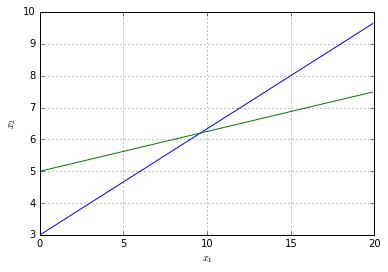

In [117]:
x_1 = arange(0, 20, 0.1)
x_2_1 = 1/3 * x_1 + 3
x_2_2 = 1/8 * x_1 + 5
figure("exercise 2")
plot(x_1, x_2_1)
plot(x_1, x_2_2)
xlabel("$x_1$")
ylabel("$x_2$")
grid()
show()

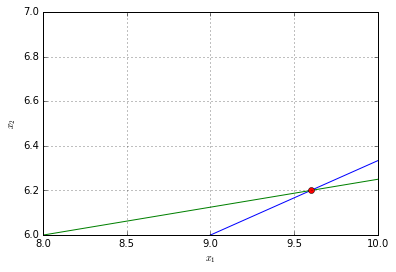

In [118]:
xlim(8, 10)
ylim(6, 7)
xlabel("$x_1$")
ylabel("$x_2$")
plot(x_1, x_2_1)
plot(x_1, x_2_2)
plot(9.6, 6.2, 'ro') # plot intersection point after locating it
grid()
show()

The solution of the system of linear equations is $(x_1 = 9.6, x_2 = 6.2)$

### Exercise 3
Study graphically (do not use any algorithms) the following function
\begin{align}
f(x) = 10.0e^{-x} \sin(2.0\pi x) + 0.5x
\end{align}
within the range $0 \leq x \leq 10$.  
What is (a) the maximum, (b) the minimum, and (c) the largest root of the function within the given range. Give the answers with four significant figures.

### Solution
First we plot the function in the given range to get the general idea where the maximum, the minium and the largest root are.
We continue zooming in by using functions xlim and ylim until we could be able to locate the solution with four significant figures.

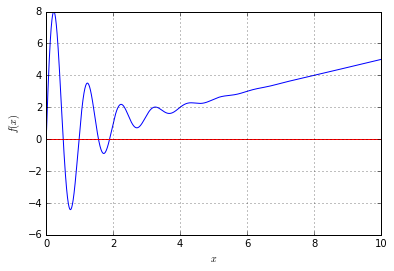

In [119]:
x = linspace(0, 10, 100000)
y = 10.0*e**(-x)*sin(2.0*pi*x) + 0.5*x

figure("exercise 3")
xlabel("$x$")
ylabel("$f(x)$")
plot(x, y)
axhline(0, color = 'r')
grid()
show()

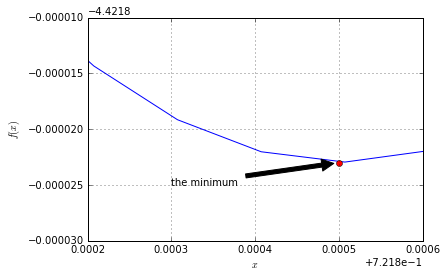

The minimum is -4.4218 at x = 0.7223


In [120]:
xlabel("$x$")
ylabel("$f(x)$")
xlim(0.722, 0.7224)
ylim(-4.42177 + array([-0.00006, -0.00004]))
plot(x, y)
plot(.7218 + .0005, -4.4218-0.000023, 'ro')
annotate('the minimum', xy=(.7218 + .0005, -4.4218-0.000023), 
         xytext=(.7218 + .0003, -4.4218 - .000025), arrowprops=dict(facecolor='black', shrink=0.05))
grid()
show()
print("The minimum is {0:.4f} at x = {1:.4f}".format(-4.4218-0.000023, .7218 + .0005))

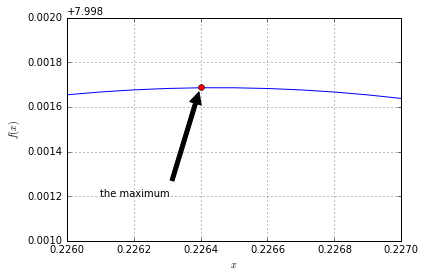

The maximum is 0.2264 at x = 7.9997


In [121]:
xlabel("$x$")
ylabel("$f(x)$")
xlim(0.226, 0.227)
ylim(7.999, 8.000)
plot(x, y)
plot(.2264, 7.998 + 0.00169, 'ro')
annotate('the maximum', xy=(.2264, 7.998 + 0.00169), 
         xytext=(.2261, 7.998 + 0.0012), arrowprops=dict(facecolor='black', shrink=0.05))
grid()
show()
print("The maximum is {0:.4f} at x = {1:.4f}".format(.2264, 7.998 + 0.00169))

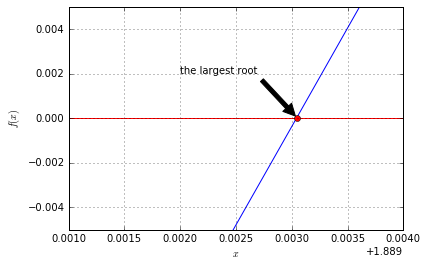

The largest root is x = 1.8921


In [122]:
xlabel("$x$")
ylabel("$f(x)$")
xlim(1.8900, 1.8930)
ylim(-0.005, 0.005)
axhline(0, color = 'r')
plot(x, y)
plot(1.889 + .00305, 0, 'ro')
annotate('the largest root', xy=(1.889 + .00305, 0), 
         xytext=(1.889 + .002, 0.002), arrowprops=dict(facecolor='black', shrink=0.05))
grid()
show()
print("The largest root is x = {0:.4f}".format(1.889 + .00305))

### Exercise 4
Complete the given code of the Gaussian elimination function with the backwardsubstitution part, e.g. implement the following equations  
$$
x_i = (b_i - \sum_{j=i+1}^{n} a_{ij}x_j)\;/a_{ii}
$$ 
  
and test and verify your algorithm by solving your choice of 3 x 3 linear equation system.

### Solution:
We add the backward substitution part using the provided equations.
After completing the gaussian function, we use it to solve a 3x3 linear equation system, then check the result with the solution provided by the imported solve function. If the results are the same, our algorithm is correct.

In [123]:
def gaussian(a,b):
    a = a.copy().astype(float)
    b = b.copy().astype(float)
    n = len(a)
    x = zeros(n)    

    for k in range(n):
        if a[k, k] == 0:
            print('unable to solve')
            return None
        # forward eliminate
        for i in range(k+1, n):
            factor = a[i, k]/a[k, k]
            for j in range(k+1, n):
                a[i, j] = a[i, j] - factor * a[k,j]
            b[i] = b[i] - factor*b[k]
            
        # back substitution
        for i in range(n-1, -1, -1):
            s = 0
            for j in range(i+1, n):
                s = s + a[i, j] * x[j]
            x[i] = (b[i] - s)/a[i,i]

    return x

A = array([[10.0, 2.0, -1.0], [-3.0, -6.0, 2.0], [1.0, 1.0, 5.0]])
b = array([27.0, -61.5, -21.5])
x = gaussian(A, b)
print('Solution by our gaussian function: x = ', x)
print('Solution by imported solve function:', solve(A,b))

Solution by our gaussian function: x =  [ 0.5  8.  -6. ]
Solution by imported solve function: [ 0.5  8.  -6. ]


### Exercise 5
Use the Gauss-Seidel iterative method to solve  
  
\begin{align*}
\begin{bmatrix}
    -2 & 5 & 9 \\
     7 & 1 & 1 \\
    -3 & 7 & -1
 \end{bmatrix} 
 \enspace  
 \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 
 \end{bmatrix} 
 =
 \begin{bmatrix}
    1 \\
    6 \\
    -26
 \end{bmatrix}
\end{align*}

### Solution
To solve this linear system of equations by Gauss-Seidel method, we need to transform the matrix to the form that the diagonal has the largest absolute value of each column. 
We just add the transform function at the beginning of the Gauss-Seidel algorithm we implemented in previous lectures.
After getting the solution, we compare it with the solution of the imported solve function. If our algorithm is correct, the solutions would be the same.

In [124]:
def pivot(A, row1, row2):
    temp = A[row2].copy()
    A[row2] = A[row1]
    A[row1] = temp
    return A

def transform(A, b):
    n = len(A)
    for i in range(n):
        r = argmax(abs(A[i:, i])) + i 
        if (i != r):
            A = pivot(A, i, r)
            b = pivot(b, i, r)
            

def gaussSeidel(A, b, x0, omega): 
    transform(A, b)
    x = x0
    for k in range(100):
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s = s + A[i, j] * x[j]
            x[i] = omega/A[i, i] * (b[i] - s) + (1 - omega)*x[i]
    return x

A = array([-2, 5, 9, 7, 1, 1, -3, 7, -1]).reshape(3, 3)
b = array([1, 6, -26])
n = len(b)
x0 = zeros(n)
print('Solution by the our gaussSeidel function: ')    
print(gaussSeidel(A, b, x0, 1))
print('Solution by the imported solve function: ')
print(solve(A, b))

Solution by the our gaussSeidel function: 
[ 1. -3.  2.]
Solution by the imported solve function: 
[ 1. -3.  2.]


### Exercise 5
The equilibrium equations of the blocks in the spring-block system are
\begin{align*}
           3(x_2 - x_1) - 2x_1      &= -80 \\
        3(x_3 - x_2) - 3(x_2 - x_1) &= 0 \\
        3(x_4 - x_3) - 3(x_3 - x_2) &= 0 \\
        3(x_5 - x_4) - 3(x_4 - x_3) &= 60 \\
           -2x_5 - 3(x_5 - x_4)     &= 0 
\end{align*}
  
where $x_i$ are the horizontal displacements of the blocks measured in mm. Solve these equations using any functions of your choice found in scipy.linalg package. Show the steps and verify your solution.

### Solution
First, we simplify each linear equation of the system to get:
\begin{align*}
           -5x_1 + 3x_2     &= -80 \\
        3x_1 - 6x_2 + 3x_3 &= 0 \\
        3x_2 - 6x_3 + 3x_4 &= 0 \\
        3x_3 - 6x_4 + 3x_5 &= 60 \\
           3x_4 - 5x_5     &= 0 
\end{align*}
Then, we translate the equations into matrix form.  
\begin{align*}
\begin{bmatrix}
    -5 & 3 & 0 & 0 & 0 \\
    3 & -6 & 3 & 0 & 0 \\
    0 & 3 & -6 & 3 & 0 \\
    0 & 0 & 3 & -6 & 3 \\
    0 & 0 & 0 & 3 & -5 
 \end{bmatrix} 
 \enspace  
 \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5
 \end{bmatrix} 
    =
 \begin{bmatrix}
   -80 \\
    0 \\
    0 \\
    60 \\
    0
 \end{bmatrix}
 \end{align*}
   
Finally, we use the imported solve function to solve the equation.
Our solution is correct if A.x equals b (A.x - b returns an array of zeros)

In [125]:
A = array([[-5.0, 3, 0, 0, 0],
           [3.0, -6, 3, 0, 0],
           [0.0, 3, -6, 3, 0],
           [0.0, 0, 3, -6, 3],
           [0.0, 0, 0, 3, -5]])
b = array([-80.0, 0, 0, 60, 0])
        
x = solve(A, b)
print('Solution:', around(x, 4))
print('Verify by A.x - b:')
print(around(dot(A, x) - b))

Solution: [ 20.7143   7.8571  -5.     -17.8571 -10.7143]
Verify by A.x - b:
[ 0. -0. -0.  0. -0.]
